# Plot PC loadings contributions

Script related to figure s1C

### Aim:
- Plot Hallmark NES PCA loadings contributions

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [5]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [6]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load ssGSEA results

In [9]:
file_nes = home + "/Data/1/HallmarksStromaImmune_NES.txt"

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [10]:
data_nes.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.136576,0.162253,0.167945,0.165872,0.108271,0.103383,0.068362,0.070162,0.111527,0.099024,...,0.128145,0.259154,0.215689,0.112651,0.200294,0.241995,0.191432,0.194714,0.189336,0.069653
HALLMARK_HYPOXIA,0.177768,0.218287,0.206637,0.228075,0.213340,0.195107,0.184773,0.176688,0.208509,0.224903,...,0.232953,0.285186,0.258845,0.242334,0.280114,0.263157,0.261287,0.254170,0.255099,0.170139
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.291056,0.307171,0.304042,0.302902,0.291291,0.302667,0.250307,0.307460,0.336655,0.289155,...,0.297822,0.311574,0.314954,0.327364,0.357201,0.325969,0.328308,0.310308,0.333764,0.306016
HALLMARK_MITOTIC_SPINDLE,0.291324,0.341755,0.332683,0.358085,0.319437,0.350527,0.438601,0.359659,0.365710,0.397053,...,0.347654,0.339620,0.356477,0.354890,0.399129,0.355274,0.337599,0.329370,0.332419,0.311622
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.151231,0.184140,0.186732,0.263275,0.215427,0.224450,0.246089,0.243030,0.228552,0.258536,...,0.126257,0.189395,0.180498,0.166626,0.236770,0.185633,0.147549,0.142399,0.126891,0.110339


### Check empty cells

In [11]:
set(data_nes.isnull().sum())

{0}

## Load mRNA tumour cellularity data

In [12]:
mRNA_tumcell_file = home + "/Data/1/TreatmentNaive_log2exp_loess_norm_filtered_ESTIMATE.txt"

mRNA_tumcell = pd.read_csv(mRNA_tumcell_file,
                           skiprows=2,
                           sep='\t',
                           index_col='NAME')

del(mRNA_tumcell['Description'])

In [13]:
mRNA_tumcell.head().head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
NAME,,,,,,,,,,,,,,,,,,,,,
StromalScore,213.898183,441.185072,627.161634,-257.879171,-105.932457,-179.742309,-667.871861,-554.187271,-467.547274,-424.048973,...,276.215651,819.700176,542.094611,446.049523,100.214812,640.683420,1028.302292,631.494907,843.594952,-393.705822
ImmuneScore,789.397143,1103.963967,996.569838,119.238243,354.124225,197.378769,-395.243536,-16.422432,-469.452988,-563.011739,...,-18.442529,526.734281,-25.089182,238.412959,-60.730519,890.081437,776.296638,680.327079,892.726571,-226.504212
ESTIMATEScore,1003.295326,1545.149039,1623.731472,-138.640928,248.191767,17.636459,-1063.115397,-570.609703,-937.000262,-987.060713,...,257.773122,1346.434456,517.005428,684.462482,39.484294,1530.764858,1804.598930,1311.821985,1736.321523,-620.210034
TumorPurity,0.730147,0.673548,0.664978,0.833913,0.801248,0.821034,0.900910,0.867208,0.892722,0.896009,...,0.800405,0.694819,0.777021,0.761314,0.819199,0.675108,0.644917,0.698464,0.652544,0.870811


### Add mRNA purity to NES dataframe

In [14]:
data_nes_t = data_nes.T 

#### Multiply purity times a small number to reduce it's impact in the PCA

In [15]:
data_nes_t['TumourCellularity_mRNA'] = mRNA_tumcell.loc['TumorPurity'] * 0.0001

In [16]:
data_nes = data_nes_t.T 

In [17]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_DN,-0.240767,-0.274158,-0.231857,-0.240881,-0.228270,-0.240445,-0.196578,-0.239584,-0.238470,-0.236185,...,-0.242543,-0.231446,-0.232364,-0.218667,-0.252284,-0.214025,-0.224493,-0.195860,-0.218489,-0.198529
HALLMARK_PANCREAS_BETA_CELLS,-0.170571,-0.158940,-0.230501,-0.147195,-0.209698,-0.166047,-0.163780,-0.171125,-0.128802,-0.200665,...,-0.181282,-0.161556,-0.172433,-0.101169,-0.136589,-0.175828,-0.131121,-0.125134,-0.137935,-0.160385
StromalSignature,0.087415,0.136906,0.166492,0.010237,0.034615,0.021982,-0.067309,-0.046947,-0.026127,-0.022315,...,0.109234,0.203958,0.155354,0.134444,0.076000,0.175493,0.250390,0.172685,0.212197,-0.014386
ImmuneSignature,0.192483,0.256464,0.230664,0.080746,0.117609,0.089100,-0.014748,0.049217,-0.023908,-0.045061,...,0.053588,0.152762,0.052564,0.097643,0.051716,0.220956,0.205281,0.183085,0.224095,0.012900
TumourCellularity_mRNA,0.000073,0.000067,0.000066,0.000083,0.000080,0.000082,0.000090,0.000087,0.000089,0.000090,...,0.000080,0.000069,0.000078,0.000076,0.000082,0.000068,0.000064,0.000070,0.000065,0.000087


### Visulase NES

#### Samples

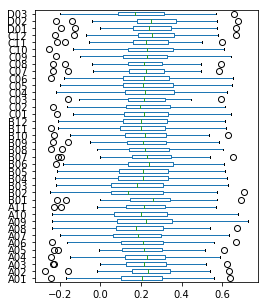

In [18]:
data_nes.plot(kind='box',
              vert=False,
              figsize=(4,5))

#### Variables

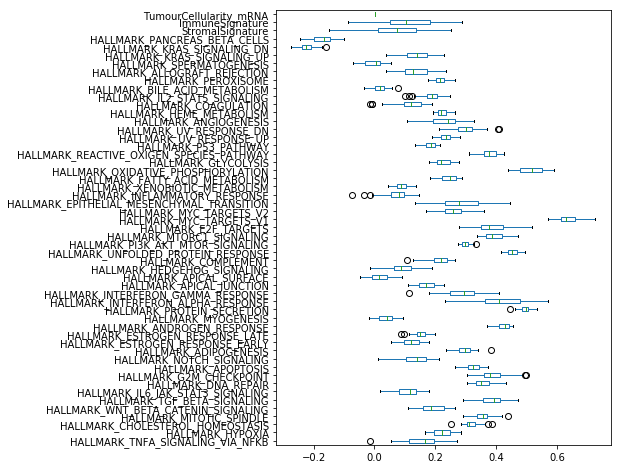

In [19]:
data_nes.transpose().plot(kind='box',
                          vert=False,
                          figsize=(6,8))

## Calculate PCA

In [20]:
pca = PCA(n_components=7)

In [21]:
pca_nes = pca.fit_transform(data_nes.transpose())

In [22]:
len(pca_nes) # check number of data points

38

In [23]:
var_exp = sorted(pca.explained_variance_ratio_, reverse=True)

## Plot features PCs contributions

### Define gene set colors

In [24]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'TumourCellularity_mRNA':                       'k'
}

### Dump components relations with features

In [25]:
components = pd.DataFrame(pca.components_,
                          columns=data_nes.transpose().columns)

In [26]:
components.head()

Term,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,...,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,TumourCellularity_mRNA
0,-0.210534,-0.099961,-0.040738,0.074858,0.077733,-0.094541,-0.156454,0.052279,0.159896,-0.108146,...,-0.028942,-0.005918,-0.180007,0.087337,-0.189345,-0.006551,-0.038352,-0.414345,-0.344977,0.000035
1,0.248142,0.129039,-0.038663,0.105183,0.128159,0.282270,-0.086887,-0.140958,-0.134789,0.050925,...,-0.044085,-0.094676,-0.237235,-0.115209,-0.001976,0.015077,-0.052048,-0.037702,-0.305079,0.000019
2,-0.198983,0.050704,-0.024107,-0.022287,-0.147814,0.035659,-0.163482,0.138266,0.097395,0.057848,...,0.083535,0.076016,-0.065966,0.084153,0.117140,-0.078408,0.115415,0.252048,-0.121580,-0.000008
3,0.155338,0.152433,0.122526,0.218383,0.218425,0.119225,0.043407,0.168101,0.351043,0.096055,...,-0.144756,-0.014705,0.034516,-0.134087,-0.082733,0.012338,-0.016371,-0.066520,-0.086000,0.000009
4,0.322402,-0.000300,0.017193,-0.084255,-0.255338,-0.093076,0.031168,0.033913,-0.153950,0.130194,...,0.050035,0.019965,0.058778,-0.154476,-0.041351,0.258717,-0.089077,-0.220995,-0.035047,0.000010


### PCs barplots

In [27]:
feature_names = pd.Series(components.columns.values,name='features')

In [28]:
PCs = pca.components_

pc_df = pd.DataFrame(PCs).T
pc_df = pd.concat([feature_names,pc_df],axis=1)

pc_df.set_index('features',inplace=True)

In [29]:
fcolors = []
for f in pc_df.index:
    fcolors.append(color_sets[f])

In [30]:
fcolors_df = pd.DataFrame({'index':pc_df.index,
                           'color':pd.Series(fcolors)})

fcolors_df.set_index('index',inplace=True)

In [31]:
pc_df = pd.concat([pc_df,fcolors_df],axis=1)

### Hallmarks colours

In [32]:
colours = ['#0000E5','#007F00','#CC0000','#D3D3D3','k','purple']
categories = ['stroma','immune','oncogenic','other','tumour_cellularity','stress']

pc_df['category'] = pc_df.color.replace(colours,
                                        categories)

cat_order = ['tumour_cellularity','oncogenic','stress','immune','stroma','other']

cat_type = CategoricalDtype(categories=cat_order,
                            ordered=True)

### Sort features within PCs

In [33]:
pc_df['category'] = pc_df['category'].astype(cat_type)

pc_df0 = pc_df.sort_values(by=['category',0],
                           inplace=False)  

pc_df0['feature'] = pc_df0.index

pc_df1 = pc_df.sort_values(by=['category',1],
                           inplace=False)

pc_df1['feature'] = pc_df1.index

pc_df2 = pc_df.sort_values(by=['category',2],
                           inplace=False)

pc_df2['feature'] = pc_df2.index

pc_df3 = pc_df.sort_values(by=['category',3],
                           inplace=False)  

pc_df3['feature'] = pc_df3.index

pc_df4 = pc_df.sort_values(by=['category',4],
                           inplace=False)  

pc_df4['feature'] = pc_df4.index

pc_df5 = pc_df.sort_values(by=['category',5],
                           inplace=False)  

pc_df5['feature'] = pc_df5.index

pc_df6 = pc_df.sort_values(by=['category',6],
                           inplace=False) 

pc_df6['feature'] = pc_df6.index

### Plot

[]

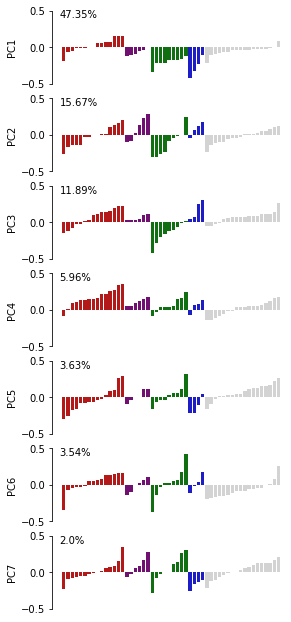

In [34]:
y_anotate=0.4

fig,(ax0,ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=7,
                                                 ncols=1,
                                                 figsize=(4, 11),
                                                 sharex=True,
                                                 sharey=True)                                               

sns.barplot(x='feature',
            y=0,
            data=pc_df0,
            palette=pc_df0.color,
            ax=ax0)

ax0.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[0]*100,2))+'%')
ax0.set_ylabel("PC1")
ax0.set_xlabel('')
ax0.set_ylim([-0.5,0.5])
sns.despine(bottom=True,trim=True,offset=5)


sns.barplot(x='feature',
            y=1,
            data=pc_df1,
            palette=pc_df1.color,
            ax=ax1)

ax1.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[1]*100,2))+'%')
ax1.set_ylabel("PC2")
ax1.set_xlabel('')


sns.barplot(x='feature',
            y=2,
            data=pc_df2,
            palette=pc_df2.color,
            ax=ax2)

ax2.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[2]*100,2))+'%')
ax2.set_ylabel("PC3")
ax2.set_xlabel('')


sns.barplot(x='feature',
            y=3,
            data=pc_df3,
            palette=pc_df3.color,
            ax=ax3)

ax3.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[3]*100,2))+'%')
ax3.set_ylabel("PC4")
ax3.set_xlabel('')


sns.barplot(x='feature',
            y=4,
            data=pc_df4,
            palette=pc_df4.color,
            ax=ax4)

ax4.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[4]*100,2))+'%')
ax4.set_ylabel("PC5")
ax4.set_xlabel('')


sns.barplot(x='feature',
            y=5,
            data=pc_df5,
            palette=pc_df5.color,
            ax=ax5)

ax5.text(x=0,
         y=y_anotate,
         s=str(round(var_exp[5]*100,2))+'%')
ax5.set_ylabel("PC6")
ax5.set_xlabel('')

sns.barplot(x='feature',
            y=6,
            data=pc_df6,
            palette=pc_df6.color,
            ax=ax6)

ax6.text(x=0,y=y_anotate,
         s=str(round(var_exp[6]*100,2))+'%')
ax6.set_ylabel("PC7")
ax6.set_xlabel('')

# Finalize the plot
sns.despine(bottom=True,trim=True,offset=5)
plt.setp(fig.axes,xticks=[])

### Save plot

In [35]:
FILE = "../../Figures/supplementary/1/panels/s1c_TreatmentNaive_PCs_loadings.pdf"

fig.savefig(FILE, bbox='tight')

# End script